# Import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
dataFrameFolder = "../../dataframe/"

In [3]:
df_workers_data = pd.read_csv(dataFrameFolder+"workers_acl_prolific_200.csv", sep=',')
df_data = pd.read_csv(dataFrameFolder+"workers_data_prolific_200.csv", sep=',')
df_workers_dim = pd.read_csv(dataFrameFolder+"workers_dim_sel_prolific_200.csv", sep=',')
df_workers_url = pd.read_csv(dataFrameFolder+"workers_urls_prolific_200.csv", sep=',')

In [4]:
df_data.head()

,worker_id,paid,task_id,batch_name,unit_id,try_last,try_current,action,time_submit,time_submit_parsed,...,doc_confidence_description,doc_accesses,doc_time_elapsed,doc_time_start,doc_time_end,global_outcome,global_form_validity,gold_checks,time_spent_check,time_check_amount
0,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:21:27 GMT",2022-08-23 12:21:27 00:00,...,NaN,1.0,171.42,1.661257e+09,1.661257e+09,True,True,True,True,True
1,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Finish,"Tue, 23 Aug 2022 12:23:46 GMT",2022-08-23 12:23:46 00:00,...,NaN,1.0,156.75,1.661257e+09,1.661257e+09,True,True,True,True,True
2,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:02:59 GMT",2022-08-23 12:02:59 00:00,...,NaN,1.0,15.74,1.661256e+09,1.661256e+09,True,True,True,True,True
3,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:06:48 GMT",2022-08-23 12:06:48 00:00,...,NaN,1.0,58.01,1.661256e+09,1.661256e+09,True,True,True,True,True
4,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:09:17 GMT",2022-08-23 12:09:17 00:00,...,NaN,1.0,34.99,1.661256e+09,1.661256e+09,True,True,True,True,True


colonne

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 66 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   worker_id                                  1599 non-null   object 
 1   paid                                       1599 non-null   bool   
 2   task_id                                    1599 non-null   object 
 3   batch_name                                 1599 non-null   object 
 4   unit_id                                    1599 non-null   object 
 5   try_last                                   1599 non-null   int64  
 6   try_current                                1599 non-null   int64  
 7   action                                     1599 non-null   object 
 8   time_submit                                1599 non-null   object 
 9   time_submit_parsed                         1599 non-null   object 
 10  doc_index               

Cosa sono le colonne:

INFO GENERALI

- worker_id -> ID del worker
- (paid -> True se il worker è stato pagato o False altrimenti)
- (task_id -> FakeNewsMultidimensionale)
- (batch_name -> V4-Prolific-1)
- unit_id -> ID dell'unità
- (try_last -> quante prove ha fatto un worker)
- (try_current -> prova che sta facendo adesso)
- (time_submit -> TIME che ha submittato una certa cosa)
- (time_submit_parsed -> TIME parsato)

STATEMENT 

- doc_index -> posizione con cui viene mostrata all'utente
- doc_id -> ID identificativo dello statement che viene mostrato (rispetto alla banca dati che abbiamo di statement)

STATEMENT GT

- doc_fact_check_ground_truth_label -> GT dello statement -> uno tra : pants-on-fire - false - baerly-true - half-true - mostly-true - true
- doc_fact_check_ground_truth_value ->  GT value dello statement: quelli di prima mappati in 0 (pants-on-fire) - 1 (false)  - 2 (baerly-true) - 3 (half-true) - 4 (mostly-true) - 5 (true)
- doc_fact_check_source -> da dove viene lo statement => politifact / gold_question

INFO speaker

- doc_speaker_name -> chi ha pronunciato lo statement (NO NULL)
- doc_speaker_party -> partito di chi ha pronunciato (DEM o REP)

STATEMENT info generali

- doc_statement_date -> data in cui è stato pronunciato lo statement
- doc_statement_description -> DATE + descrizione dello statement 
- doc_statement_text -> testo dello statement (ciò che viene letto dal worker)

URL

- doc_evidence_url -> url fornito dall'utente per confermare/smentire statement

COMPLETEZZA DELLO STATEMENT (per il worker)

- doc_completeness_value -> -2 (completely-disagree)  -1 (partially-disagree) 0 (neutral) +1 (partially-agree) +2 (completely-agree)
- doc_completeness_label -> completely-disagree - partially-disagree - neutral - partially-agree - completely-agree
- doc_completeness_index -> 0 (completely-disagree)  - 1 (partially-disagree) - 2 (neutral) - 3 (partially-agree) - 4 (completely-agree)
- (doc_completeness_description -> NULL)

quanto lo statement è COMPRENSIBILE (per il worker)

- doc_comprensibility_value -> -2 (completely-disagree)  -1 (partially-disagree) 0 (neutral) +1 (partially-agree) +2 (completely-agree)
- doc_comprensibility_label -> completely-disagree - partially-disagree - neutral - partially-agree - completely-agree
- doc_comprensibility_index -> 0 (completely-disagree)  - 1 (partially-disagree) - 2 (neutral) - 3 (partially-agree) - 4 (completely-agree)
- (doc_comprensibility_description -> NULL)

Quanto lo STATEMENT DA INFORMAZIONI per essere true/false (per il worker)

- doc_informativeness_value -> -2 (completely-disagree)  -1 (partially-disagree) 0 (neutral) +1 (partially-agree) +2 (completely-agree)
- doc_informativeness_label -> completely-disagree - partially-disagree - neutral - partially-agree - completely-agree
- doc_informativeness_index -> 0 (completely-disagree)  - 1 (partially-disagree) - 2 (neutral) - 3 (partially-agree) - 4 (completely-agree)
- (doc_informativeness_description -> NULL)

imparzialità DELLO STATEMENT (per il worker)

- doc_unbiasedness_value -> -2 (completely-disagree)  -1 (partially-disagree) 0 (neutral) +1 (partially-agree) +2 (completely-agree)
- doc_unbiasedness_label -> completely-disagree - partially-disagree - neutral - partially-agree - completely-agree
- doc_unbiasedness_index -> 0 (completely-disagree)  - 1 (partially-disagree) - 2 (neutral) - 3 (partially-agree) - 4 (completely-agree)
- (doc_unbiasedness_description -> NULL)

ACCURATEZZA DELLO STATEMENT (per il worker)

- doc_accuracy_value -> -2 (completely-disagree)  -1 (partially-disagree) 0 (neutral) +1 (partially-agree) +2 (completely-agree)
- doc_accuracy_label -> completely-disagree - partially-disagree - neutral - partially-agree - completely-agree
- doc_accuracy_index -> 0 (completely-disagree)  - 1 (partially-disagree) - 2 (neutral) - 3 (partially-agree) - 4 (completely-agree)
- (doc_accuracy_description -> NULL)

quanto il worker si FIDA dello SPEAKER

- doc_speaker's-trustworthiness_value -> -2 (completely-disagree)  -1 (partially-disagree) 0 (neutral) +1 (partially-agree) +2 (completely-agree)
- doc_speaker's-trustworthiness_label -> completely-disagree - partially-disagree - neutral - partially-agree - completely-agree
- doc_speaker's-trustworthiness_index -> 0 (completely-disagree)  - 1 (partially-disagree) - 2 (neutral) - 3 (partially-agree) - 4 (completely-agree)
- (doc_speaker's-trustworthiness_description -> NULL)

VERIDICITA' dello STATEMENT (per il worker)

- doc_truthfulness_value -> 0 (lie)  - 1 (false) - 2 (barely-true) - 3 (half-true) - 4 (mostly-true) - 5 (true)
- doc_truthfulness_label -> lie - false - berely-true - half-true - mostly-true - true
- doc_truthfulness_index -> 0 (lie)  - 1 (false) - 2 (barely-true) - 3 (half-true) - 4 (mostly-true) - 5 (true)
- (doc_truthfulness_description -> NULL)

CONFIDENZA DELLLO STATEMENT (per il worker)

- doc_confidence_value -> -2 (completely-disagree)  -1 (partially-disagree) 0 (neutral) +1 (partially-agree) +2 (completely-agree)
- doc_confidence_label -> completely-disagree - partially-disagree - neutral - partially-agree - completely-agree
- doc_confidence_index -> 0 (completely-disagree)  - 1 (partially-disagree) - 2 (neutral) - 3 (partially-agree) - 4 (completely-agree)
- (doc_confidence_description -> NULL) 

TEMPI

- doc_time_elapsed -> tempo per farlo
- doc_time_start -> tempo di inizio
- doc_time_end -> tempo di fine

CHECKS

- (global_outcome)
- (global_form_validity)
- (gold_checks ->)
- (time_spent_checks)
- (time spen)


NOTA:
- tra () quelle che sono inutili --> da eliminare
- tengo solo index

In [6]:
df_data["worker_id"].value_counts()

55b645b1fdf99b1c02906872    8
614f6bad672ef7cf5ecfd965    8
615dbf532dce1f14ef1b3ddc    8
6168b61ad8c0d63b37a92109    8
6168cbfbad1cc13ba73ade6e    8
                           ..
5ee5e3b02eebe932ee9559c5    8
5f067f5d65bf871ea04329ed    8
5f0a7dec44c42c19a6c9f6d9    8
6301b7caed960c3930057c7a    8
61719bfec06e3136189edb55    7
Name: worker_id, Length: 200, dtype: int64

    ogni worker ha risposto a 8 domande (6 normali + 2 di controllo )

In [7]:
df_data["doc_id"].value_counts()

GOLD_HIGH                                             200
GOLD_LOW                                              200
joni-ernst-target-describing-11th-hour-obama-rule-     10
joe-biden-said-mass-shootings-tripled-when-assault     10
do-republicans-want-throw-doctors-who-break-aborti     10
                                                     ... 
gop-senate-candidate-hinckley-says-there-no-money-     10
fact-checking-bernie-sanders-attack-florida-gov-ro     10
jd-vance-says-transgender-rights-drives-looming-co     10
pennsylvania-us-senate-candidate-kathy-barnette-wa     10
research-submitted-fda-consideration-vaccine-autho      9
Name: doc_id, Length: 122, dtype: int64

    GOLD_HIGH e GOLD_LOW sono state risposte da tutti
    le altre sono state risposte da 10 worker ciascuna
    in tutto ci sono 120 statement + 2 GOLD

In [8]:
columns_to_mantain = ["unit_id", 
                      "doc_fact_check_source",
                      "doc_index", 
                      "doc_id", 
                      "doc_statement_text",
                      "doc_statement_description", 
                      "doc_fact_check_ground_truth_label", 
                      "doc_fact_check_ground_truth_value", 
                      "doc_truthfulness_label",
                      "doc_truthfulness_index",
                      "doc_speaker_name",
                      "doc_speaker_party",
                      "doc_evidence_url",
                      "doc_completeness_index",
                      "doc_comprehensibility_index",
                      "doc_informativeness_index",
                      "doc_unbiasedness_index",
                      "doc_accuracy_index",
                      "doc_speaker's-trustworthiness_index",
                      "doc_confidence_index",
                      "doc_time_elapsed",
                      "worker_id"]

calcolo quanti statement ci sono per ciascun GT

In [9]:
categorie_GT = [ "pants-on-fire" , "false", "half-true" , "mostly-true" , "true"]

In [10]:
for val in categorie_GT:
    print("numero per " + val +" =" ,len(df_data[df_data['doc_fact_check_ground_truth_label'] == val]["doc_id"].unique()))

numero per pants-on-fire = 21
numero per false = 20
numero per half-true = 20
numero per mostly-true = 20
numero per true = 21


    notiamo che gli estremi hanno 21 e gli altri hanno 20 => questo perchè ci sono le GOLD

HA SENSO MANTENRE LE GOLD? -> io le rimuovo (chiedi se ho fatto bene)

In [11]:
df_data[df_data["doc_id"] == "GOLD_HIGH"][["doc_statement_text","worker_id"]].drop_duplicates()

,doc_statement_text,worker_id
3,Texas's public high school graduation rate is ...,55b645b1fdf99b1c02906872
14,Texas's public high school graduation rate is ...,55ca03e1fdf99b2735fc1dde
20,Texas's public high school graduation rate is ...,5658000ca9872d0011e1ba26
25,Texas's public high school graduation rate is ...,565bdfcec121fe0012fc3897
32,Texas's public high school graduation rate is ...,567dd32b4f0ef30006dbb718
...,...,...
1566,Texas's public high school graduation rate is ...,62fe9bebf5d09924e321a32c
1571,Texas's public high school graduation rate is ...,62ff8c9ff1c92a7c721d3fcc
1577,Texas's public high school graduation rate is ...,62ffe924cae68af25dd6c1d3
1584,Texas's public high school graduation rate is ...,63011587244386e361cd2f6c


In [12]:
df_data["doc_fact_check_source"].unique()

array(['Politifact', 'gold_question'], dtype=object)

In [13]:
df_data[df_data["worker_id"] == "55b645b1fdf99b1c02906872"]["doc_id"]

0    joni-ernst-target-describing-11th-hour-obama-r...
1    gop-challenger-overstates-parole-boards-record...
2    greene-twists-logic-and-facts-pedophilia-charg...
3                                            GOLD_HIGH
4    barnes-partially-right-claim-johnson-has-recei...
5    david-jolly-says-kathleen-peters-wont-take-sta...
6                                             GOLD_LOW
7    john-boehner-says-stimulus-bill-was-rushed-pas...
Name: doc_id, dtype: object

In [14]:
df_NO_golds_allData = df_data[df_data["doc_id"] != "GOLD_HIGH"]
df_NO_golds_allData = df_NO_golds_allData[df_NO_golds_allData["doc_id"] != "GOLD_LOW"]

In [15]:
df_NO_golds_allData["doc_id"].value_counts()

joni-ernst-target-describing-11th-hour-obama-rule-    10
joe-biden-said-mass-shootings-tripled-when-assault    10
do-republicans-want-throw-doctors-who-break-aborti    10
do-160-million-americans-like-their-health-insur      10
sen-stephen-wise-says-everybody-death-row-was-fost    10
                                                      ..
gop-senate-candidate-hinckley-says-there-no-money-    10
fact-checking-bernie-sanders-attack-florida-gov-ro    10
jd-vance-says-transgender-rights-drives-looming-co    10
pennsylvania-us-senate-candidate-kathy-barnette-wa    10
research-submitted-fda-consideration-vaccine-autho     9
Name: doc_id, Length: 120, dtype: int64

Tengo solo alcune colonne

In [16]:
# df_NO_golds_allData = df_NO_golds_allData[columns_to_mantain]

In [17]:
df_NO_golds_allData.head()

,worker_id,paid,task_id,batch_name,unit_id,try_last,try_current,action,time_submit,time_submit_parsed,...,doc_confidence_description,doc_accesses,doc_time_elapsed,doc_time_start,doc_time_end,global_outcome,global_form_validity,gold_checks,time_spent_check,time_check_amount
0,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:21:27 GMT",2022-08-23 12:21:27 00:00,...,NaN,1.0,171.42,1.661257e+09,1.661257e+09,True,True,True,True,True
1,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Finish,"Tue, 23 Aug 2022 12:23:46 GMT",2022-08-23 12:23:46 00:00,...,NaN,1.0,156.75,1.661257e+09,1.661257e+09,True,True,True,True,True
2,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:02:59 GMT",2022-08-23 12:02:59 00:00,...,NaN,1.0,15.74,1.661256e+09,1.661256e+09,True,True,True,True,True
4,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:09:17 GMT",2022-08-23 12:09:17 00:00,...,NaN,1.0,34.99,1.661256e+09,1.661256e+09,True,True,True,True,True
5,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:12:09 GMT",2022-08-23 12:12:09 00:00,...,NaN,1.0,169.21,1.661256e+09,1.661256e+09,True,True,True,True,True


In [18]:
def get_mean_values_by_column(df, column):
    mean_values = []

    unique_values = df[column].unique()

    for id in unique_values:
        filtered_df = df[df[column] == id]
        values = filtered_df['doc_truthfulness_index'].to_numpy()
        mean_values.append([id,values.mean(),df_NO_golds_allData[df_NO_golds_allData["doc_id"] == id]["doc_fact_check_ground_truth_label"].unique()[0]]) 

    mean_values

    return pd.DataFrame(mean_values, columns=['doc_id', 'mean', 'GT'])



In [19]:
def creaBoxPlot(df, x_field, y_field, title,palette_array, color_of_points, add_stripplot):    
    # boxplot
    ax = sns.boxplot(x=x_field, y=y_field,palette=palette_array, data=df,order=['pants-on-fire', 'false', 'barely-true','half-true','mostly-true','true'])
   
    if add_stripplot:           
        #ax = sns.stripplot(x=x_field, y=y_field, data=df,palette=["black","red","red","red","red"],hue="quartile", jitter=0.1, size=8, order=['pants-on-fire', 'false', 'barely-true','half-true','mostly-true','true'])
        ax = sns.stripplot(x=x_field, y=y_field, data=df,palette="deep",hue="quartile", jitter=0.1, size=8, order=['pants-on-fire', 'false', 'barely-true','half-true','mostly-true','true'])

    else:
        ax = sns.stripplot(x=x_field, y=y_field, data=df,  palette=color_of_points, jitter=0.1, size=8, order=['pants-on-fire', 'false', 'barely-true','half-true','mostly-true','true'])

    # add title
    plt.title(title, loc="left")
    # show the graph
    plt.show()

In [20]:
df = get_mean_values_by_column(df_NO_golds_allData, "doc_id")

C:\Users\gabri\AppData\Local\Temp\ipykernel_4048\3082281334.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(x=x_field, y=y_field, data=df,  palette=color_of_points, jitter=0.1, size=8, order=['pants-on-fire', 'false', 'barely-true','half-true','mostly-true','true'])


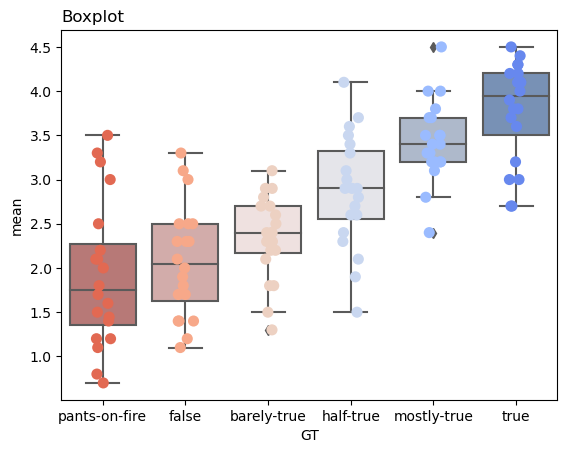

In [30]:
creaBoxPlot(df, "GT", "mean", "Boxplot", "vlag_r", "coolwarm_r", False)

In [19]:
def extract_quartiles(df,column,value,quartile_value):
    df_solo_quartili = df[df[column] == value]
    q = df_solo_quartili['mean'].quantile(quartile_value)
    if quartile_value == 0.25:
        df_quartile = df_solo_quartili[df_solo_quartili['mean'] <= q]
        return df_quartile.sort_values(by=['mean'])
    else:
        df_quartile = df_solo_quartili[df_solo_quartili['mean'] >= q]
        return df_quartile.sort_values(by=['mean'])

In [20]:
wrong_false = extract_quartiles(df,"GT","pants-on-fire",0.75)
correct_false = extract_quartiles(df,"GT","pants-on-fire",0.25)
wrong_true = extract_quartiles(df,"GT","true",0.25)
correct_true = extract_quartiles(df,"GT","true",0.75)

In [21]:
df

,doc_id,mean,GT
0,joni-ernst-target-describing-11th-hour-obama-r...,3.4,mostly-true
1,gop-challenger-overstates-parole-boards-record...,1.4,false
2,greene-twists-logic-and-facts-pedophilia-charg...,1.2,pants-on-fire
3,barnes-partially-right-claim-johnson-has-recei...,2.6,half-true
4,david-jolly-says-kathleen-peters-wont-take-sta...,2.7,barely-true
...,...,...,...
115,fact-checking-joe-biden-inflation-rates-among-...,2.3,half-true
116,david-dewhurst-says-he-never-supported-texas-p...,2.5,false
117,does-new-york-lead-nation-population-loss,4.1,true
118,yang-cites-maternal-mortality-stats-talk-about...,4.2,true


In [22]:
for index, row in df.iterrows():
    if row['doc_id'] in wrong_false['doc_id'].values:
       df.at[index,'quartile'] = "wrong_false"
    elif row['doc_id'] in correct_false['doc_id'].values:
       df.at[index,'quartile'] = "correct_false"
    elif row['doc_id'] in wrong_true['doc_id'].values:
       df.at[index,'quartile'] = "wrong_true"
    elif row['doc_id'] in correct_true['doc_id'].values:
       df.at[index,'quartile'] = "correct_true"
    else:
        df.at[index,'quartile'] = "other"

In [23]:
df_mean_true = df[df['GT'] == "true"]
df_mean_false = df[df['GT'] == "pants-on-fire"]

In [24]:
df_mean_true

,doc_id,mean,GT,quartile
5,john-boehner-says-stimulus-bill-was-rushed-pas...,4.0,true,other
10,yes-tax-break-ron-johnson-pushed-2017-has-bene...,4.3,true,correct_true
16,susan-collins-says-year-overwhelming-majority-...,3.0,true,wrong_true
20,fact-checking-bernie-sanders-claim-us-spends-t...,3.6,true,other
22,more-50-years-ago-new-york-republican-support-...,3.7,true,other
25,state-crime-lab-doing-less-testing-and-general...,3.0,true,wrong_true
38,warrens-argument-millions-cant-afford-their-rx...,4.1,true,other
39,allan-fung-former-ri-gov-donald-carcieri-has-n...,2.7,true,wrong_true
45,virginia-blacks-eight-times-more-likely-whites...,4.5,true,correct_true
55,yes-its-true-cannabis-reform-supported-wiscons...,3.9,true,other


In [25]:
df_solo_quartili = df[df['quartile'] != "other"]

In [26]:
df_solo_quartili

,doc_id,mean,GT,quartile
2,greene-twists-logic-and-facts-pedophilia-charg...,1.2,pants-on-fire,correct_false
7,ohios-mandel-repeats-false-claim-stolen-2020-e...,1.1,pants-on-fire,correct_false
10,yes-tax-break-ron-johnson-pushed-2017-has-bene...,4.3,true,correct_true
11,suozzi-calling-hochul-interim-governor-s-misle...,3.2,pants-on-fire,wrong_false
16,susan-collins-says-year-overwhelming-majority-...,3.0,true,wrong_true
25,state-crime-lab-doing-less-testing-and-general...,3.0,true,wrong_true
32,jd-vance-says-transgender-rights-drives-loomin...,1.2,pants-on-fire,correct_false
39,allan-fung-former-ri-gov-donald-carcieri-has-n...,2.7,true,wrong_true
44,common-core-testing-homosexual-possibly-can,0.7,pants-on-fire,correct_false
45,virginia-blacks-eight-times-more-likely-whites...,4.5,true,correct_true


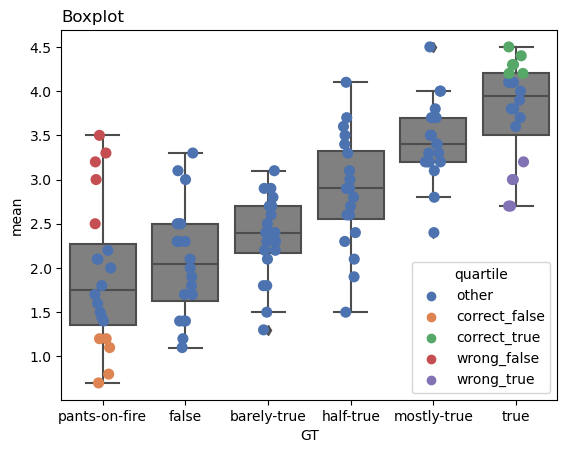

In [27]:
creaBoxPlot(df, "GT", "mean", "Boxplot", ["grey"],  ["black"], True)

CREA CSV ALL

In [28]:
df

,doc_id,mean,GT,quartile
0,joni-ernst-target-describing-11th-hour-obama-r...,3.4,mostly-true,other
1,gop-challenger-overstates-parole-boards-record...,1.4,false,other
2,greene-twists-logic-and-facts-pedophilia-charg...,1.2,pants-on-fire,correct_false
3,barnes-partially-right-claim-johnson-has-recei...,2.6,half-true,other
4,david-jolly-says-kathleen-peters-wont-take-sta...,2.7,barely-true,other
...,...,...,...,...
115,fact-checking-joe-biden-inflation-rates-among-...,2.3,half-true,other
116,david-dewhurst-says-he-never-supported-texas-p...,2.5,false,other
117,does-new-york-lead-nation-population-loss,4.1,true,other
118,yang-cites-maternal-mortality-stats-talk-about...,4.2,true,correct_true


In [29]:
data = df_data[df_data["doc_id"] != "GOLD_HIGH"]
data = data[data["doc_id"] != "GOLD_LOW"]

In [30]:
data['quartile'] = 1
data['mean'] = 0

In [31]:
for index, row in data.iterrows():
    id = row['doc_id']
    data.at[index,'quartile'] = df[df["doc_id"] == id]['quartile'].values[0]
    data.at[index,'mean'] = df[df["doc_id"] == id]['mean'].values[0]
    

In [32]:
for index, row in data.iterrows():
    if row["doc_fact_check_ground_truth_label"] == "true" and row['quartile'] == "other":
        data.at[index,'quartile'] = "other_true"
    if row["doc_fact_check_ground_truth_label"] == "pants-on-fire" and row['quartile'] == "other":
        data.at[index,'quartile'] = "other_false"

In [33]:
data["sovra"] = 0
for index, row in data.iterrows():
    if row["doc_fact_check_ground_truth_label"] == "true":
        data.at[index,'sovra'] = "true"
    elif row["doc_fact_check_ground_truth_label"] == "pants-on-fire":
        data.at[index,'sovra'] = "pants-on-fire"
    else:
        data.at[index,'sovra'] = "other"

In [34]:
data[data["doc_fact_check_ground_truth_label"] == "pants-on-fire"][["doc_id","doc_fact_check_ground_truth_label","quartile","mean"]].head(10)

,doc_id,doc_fact_check_ground_truth_label,quartile,mean
2,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,correct_false,1.2
9,ohios-mandel-repeats-false-claim-stolen-2020-e...,pants-on-fire,correct_false,1.1
16,suozzi-calling-hochul-interim-governor-s-misle...,pants-on-fire,wrong_false,3.2
31,graphic-labeled-top-ten-most-unhealthy-us-citi...,pants-on-fire,other_false,1.7
35,suozzi-calling-hochul-interim-governor-s-misle...,pants-on-fire,wrong_false,3.2
46,georgias-david-perdue-said-elections-were-stol...,pants-on-fire,other_false,2.1
54,jd-vance-says-transgender-rights-drives-loomin...,pants-on-fire,correct_false,1.2
59,claim-kids-more-likely-have-access-crack-pipes...,pants-on-fire,other_false,1.4
71,common-core-testing-homosexual-possibly-can,pants-on-fire,correct_false,0.7
76,claim-nominee-ketanji-brown-jackson-wants-defu...,pants-on-fire,other_false,1.5


In [35]:
data[["doc_id","doc_fact_check_ground_truth_label","quartile","mean","sovra"]].head(10)

,doc_id,doc_fact_check_ground_truth_label,quartile,mean,sovra
0,joni-ernst-target-describing-11th-hour-obama-r...,mostly-true,other,3.4,other
1,gop-challenger-overstates-parole-boards-record...,false,other,1.4,other
2,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,correct_false,1.2,pants-on-fire
4,barnes-partially-right-claim-johnson-has-recei...,half-true,other,2.6,other
5,david-jolly-says-kathleen-peters-wont-take-sta...,barely-true,other,2.7,other
7,john-boehner-says-stimulus-bill-was-rushed-pas...,true,other_true,4.0,true
8,ron-desantis-exaggerates-outstanding-graduate-...,barely-true,other,2.6,other
9,ohios-mandel-repeats-false-claim-stolen-2020-e...,pants-on-fire,correct_false,1.1,pants-on-fire
10,lauren-boebert-wrong-founding-fathers-intent-e...,false,other,2.1,other
11,hard-pin-down-growing-cost-unused-border-mater...,half-true,other,3.6,other


In [36]:
data.to_csv("df_all_data.csv")

CREA CSV per quartili

In [37]:
df_allData_quartile = df_data[df_data["doc_id"].isin(df_solo_quartili["doc_id"])]


In [38]:
len(df_allData_quartile[["doc_id"]].sort_values(by=['doc_id']).value_counts())

21

In [39]:
df_allData_quartile['quartile'] = 1
df_allData_quartile['mean'] = 0

C:\Users\gabri\AppData\Local\Temp\ipykernel_18276\269757852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allData_quartile['quartile'] = 1
C:\Users\gabri\AppData\Local\Temp\ipykernel_18276\269757852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allData_quartile['mean'] = 0


In [40]:
for index, row in df_allData_quartile.iterrows():
    if row['doc_id'] in wrong_false['doc_id'].values:
       df_allData_quartile.at[index,'quartile'] = "wrong_false"
       df_allData_quartile.at[index,'mean'] = wrong_false[wrong_false['doc_id'] == row['doc_id']]['mean'].values[0]
    elif row['doc_id'] in correct_false['doc_id'].values:
       df_allData_quartile.at[index,'quartile'] = "correct_false"
       df_allData_quartile.at[index,'mean'] = correct_false[correct_false['doc_id'] == row['doc_id']]['mean'].values[0]
    elif row['doc_id'] in wrong_true['doc_id'].values:
       df_allData_quartile.at[index,'quartile'] = "wrong_true"
       df_allData_quartile.at[index,'mean'] = wrong_true[wrong_true['doc_id'] == row['doc_id']]['mean'].values[0]
    elif row['doc_id'] in correct_true['doc_id'].values:
       df_allData_quartile.at[index,'quartile'] = "correct_true"
       df_allData_quartile.at[index,'mean'] = correct_true[correct_true['doc_id'] == row['doc_id']]['mean'].values[0]
    else:
        print("errore")

In [41]:
df_allData_quartile[["doc_id",'quartile','mean']].sort_values(by=['doc_id']).value_counts()

doc_id                                              quartile       mean
allan-fung-former-ri-gov-donald-carcieri-has-not-b  wrong_true     2.7     10
ohios-mandel-repeats-false-claim-stolen-2020-elect  correct_false  1.1     10
yang-cites-maternal-mortality-stats-talk-about-rac  correct_true   4.2     10
virginia-blacks-eight-times-more-likely-whites-be-  correct_true   4.5     10
tax-shift-lou-greenwald-sets-truth-o-meter-ablaze-  wrong_false    3.5     10
susan-collins-says-year-overwhelming-majority-new-  wrong_true     3.0     10
suozzi-calling-hochul-interim-governor-s-misleadin  wrong_false    3.2     10
state-crime-lab-doing-less-testing-and-generally-t  wrong_true     3.0     10
some-teachouts-donors-also-gave-super-pacs          wrong_true     3.2     10
republican-senate-hopeful-claims-montana-sen-jon-t  wrong_false    3.3     10
no-these-mass-shootings-werent-plot-protect-hillar  correct_false  0.8     10
big-four-meat-packers-are-seeing-record-profits-sp  correct_true   4.2

In [42]:
df_allData_quartile.to_csv("df_quartiles.csv")

In [43]:
for val in [ "wrong_false", "correct_false", "wrong_true", "correct_true"]:
    print("numero per " + val +" =" ,len(df_allData_quartile[df_allData_quartile['quartile'] == val]["doc_id"].unique()))

numero per wrong_false = 5
numero per correct_false = 5
numero per wrong_true = 5
numero per correct_true = 6


    Crea CSV per TRUE e FALSE

In [44]:
df_true_all = df_data[df_data["doc_id"].isin(df_mean_true["doc_id"])]
len(df_true_all[["doc_id"]].sort_values(by=['doc_id']).value_counts())

20

In [45]:
df_true_all['quartile'] = 1
df_true_all['mean'] = 0

C:\Users\gabri\AppData\Local\Temp\ipykernel_18276\184496925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_all['quartile'] = 1
C:\Users\gabri\AppData\Local\Temp\ipykernel_18276\184496925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_all['mean'] = 0


In [46]:
for index, row in df_true_all.iterrows():
   if row['doc_id'] in wrong_true['doc_id'].values:
      df_true_all.at[index,'quartile'] = "wrong_true"
      df_true_all.at[index,'mean'] = df_mean_true[df_mean_true['doc_id'] == row['doc_id']]['mean'].values[0]
   elif row['doc_id'] in correct_true['doc_id'].values:
      df_true_all.at[index,'quartile'] = "correct_true"
      df_true_all.at[index,'mean'] = df_mean_true[df_mean_true['doc_id'] == row['doc_id']]['mean'].values[0]
   else:
      df_true_all.at[index,'quartile'] = "other"
      df_true_all.at[index,'mean'] = df_mean_true[df_mean_true['doc_id'] == row['doc_id']]['mean'].values[0]
   
    

In [47]:
df_true_all[["doc_id",'quartile','mean']].sort_values(by=['doc_id']).value_counts()

doc_id                                              quartile      mean
allan-fung-former-ri-gov-donald-carcieri-has-not-b  wrong_true    2.7     10
big-four-meat-packers-are-seeing-record-profits-sp  correct_true  4.2     10
yes-tax-break-ron-johnson-pushed-2017-has-benefite  correct_true  4.3     10
yes-its-true-cannabis-reform-supported-wisconsin-i  other         3.9     10
yes-democrats-do-need-more-majority-codify-roe-vs-  other         4.1     10
yang-cites-maternal-mortality-stats-talk-about-rac  correct_true  4.2     10
warrens-argument-millions-cant-afford-their-rx-dru  other         4.1     10
virginia-blacks-eight-times-more-likely-whites-be-  correct_true  4.5     10
susan-collins-says-year-overwhelming-majority-new-  wrong_true    3.0     10
state-crime-lab-doing-less-testing-and-generally-t  wrong_true    3.0     10
some-teachouts-donors-also-gave-super-pacs          wrong_true    3.2     10
new-york-state-so-many-bills                        correct_true  4.3     10
more-

In [48]:
df_true_all.to_csv("df_true.csv")

FALSE

In [49]:
df_false_all = df_data[df_data["doc_id"].isin(df_mean_false["doc_id"])]
len(df_false_all[["doc_id"]].sort_values(by=['doc_id']).value_counts())

20

In [50]:
df_false_all['quartile'] = 1
df_false_all['mean'] = 0

C:\Users\gabri\AppData\Local\Temp\ipykernel_18276\2749065718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false_all['quartile'] = 1
C:\Users\gabri\AppData\Local\Temp\ipykernel_18276\2749065718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false_all['mean'] = 0


In [51]:
for index, row in df_false_all.iterrows():
   if row['doc_id'] in wrong_false['doc_id'].values:
      df_false_all.at[index,'quartile'] = "wrong_false"
      df_false_all.at[index,'mean'] = df_mean_false[df_mean_false['doc_id'] == row['doc_id']]['mean'].values[0]
   elif row['doc_id'] in correct_false['doc_id'].values:
      df_false_all.at[index,'quartile'] = "correct_false"
      df_false_all.at[index,'mean'] = df_mean_false[df_mean_false['doc_id'] == row['doc_id']]['mean'].values[0]
   else:
      df_false_all.at[index,'quartile'] = "other"
      df_false_all.at[index,'mean'] = df_mean_false[df_mean_false['doc_id'] == row['doc_id']]['mean'].values[0]
   
    

In [52]:
df_false_all[["doc_id",'quartile','mean']].sort_values(by=['doc_id']).value_counts()

doc_id                                              quartile       mean    
bob-good-invents-position-ketanji-brown-jackson-la  other          1.600000    10
claim-kids-more-likely-have-access-crack-pipes-mas  other          1.400000    10
tax-shift-lou-greenwald-sets-truth-o-meter-ablaze-  wrong_false    3.500000    10
suozzi-calling-hochul-interim-governor-s-misleadin  wrong_false    3.200000    10
republican-senate-hopeful-claims-montana-sen-jon-t  wrong_false    3.300000    10
ohios-mandel-repeats-false-claim-stolen-2020-elect  correct_false  1.100000    10
ohio-gop-candidate-falsely-says-more-votes-registe  other          1.800000    10
no-these-mass-shootings-werent-plot-protect-hillar  correct_false  0.800000    10
jd-vance-says-transgender-rights-drives-looming-co  correct_false  1.200000    10
greene-twists-logic-and-facts-pedophilia-charge-ag  correct_false  1.200000    10
graphic-labeled-top-ten-most-unhealthy-us-cities-d  other          1.700000    10
gov-john-kasich-says-h

In [53]:
df_false_all.to_csv("df_false.csv")

# TEST VARI

In [54]:
analisi = df_data.drop_duplicates(subset=['doc_id'])

In [55]:
analisi[["doc_speaker_party"]].value_counts()

doc_speaker_party
DEM                  65
REP                  56
dtype: int64

In [56]:
df_workers_data.columns

Index(['worker_id', 'access_counter', 'token_input', 'user_agent_source',
       'ip_address', 'generated', 'ip_source', 'time_removal', 'try_current',
       'paid', 'batch_name', 'token_output', 'unit_id', 'session_i_d',
       'time_completion', 'in_progress', 'user_agent', 'time_arrival',
       'task_name', 'folder', 'time_expired', 'study_i_d', 'platform',
       'try_left', 'source_acl', 'source_data', 'source_log', 'source_path',
       'try_last', 'task_id', 'tries_amount', 'questionnaire_amount',
       'questionnaire_amount_start', 'questionnaire_amount_end',
       'documents_amount', 'dimensions_amount', 'time_arrival_parsed',
       'time_completion_parsed', 'time_removal_parsed'],
      dtype='object')

In [57]:
df_workers_data["dimensions_amount"].value_counts()

10.0    200
Name: dimensions_amount, dtype: int64

In [58]:
df_workers_dim.columns

Index(['worker_id', 'paid', 'task_id', 'batch_name', 'unit_id', 'try_last',
       'try_current', 'dimension_index', 'dimension_name', 'timestamp_start',
       'timestamp_start_parsed', 'selection_index', 'selection_value',
       'selection_label', 'selection_timestamp', 'selection_timestamp_parsed',
       'selection_time_elapsed', 'timestamp_end', 'timestamp_end_parsed',
       'document_index', 'document_id'],
      dtype='object')

In [59]:
df_workers_url.columns

Index(['worker_id', 'paid', 'try_last', 'try_current', 'document_index',
       'document_id', 'dimension_index', 'dimension_name', 'query_index',
       'query_text', 'query_timestamp', 'query_timestamp_parsed',
       'response_index', 'response_url', 'response_name', 'response_snippet',
       'response_uuid', 'index_selected'],
      dtype='object')

In [60]:
df_workers_url["dimension_index"].value_counts()

0    49259
Name: dimension_index, dtype: int64